In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statistics

%matplotlib inline

In [2]:
dm = pd.read_csv('dmtest_final1.csv').append(pd.read_csv('dmtest_final2.csv'))
dm = dm.drop_duplicates()
dm = dm.reset_index(drop = True)
dm = dm.drop(columns=['Unnamed: 0'])
dm

,location,nm,p_nm,ne,p_ne,ns,p_ns,nl,p_nl,me,...,ms,p_ms,ml,p_ml,es,p_es,el,p_el,sl,p_sl
0,5.0,4.622553,4.824153e-06,3.426435,6.616387e-04,2.033376,4.253903e-02,4.461723,1.003995e-05,-3.083871,...,-6.756858,3.911792e-11,2.829071,4.854785e-03,-7.754943,4.945918e-14,6.564487,1.302427e-10,8.800035,2.198778e-17
1,6.0,3.450974,6.055778e-04,2.206876,2.777363e-02,1.994347,4.665339e-02,3.894268,1.117879e-04,-5.445130,...,-6.016535,3.433681e-09,4.037844,6.235916e-05,-1.399143,1.623866e-01,6.576522,1.208996e-10,7.565229,1.856658e-13
2,7.0,4.485976,9.001969e-06,2.689324,7.397442e-03,2.066723,3.927144e-02,3.814735,1.532822e-04,-2.989960,...,-4.359940,1.578557e-05,0.885496,3.763124e-01,-2.850196,4.548553e-03,3.394126,7.428492e-04,5.044630,6.356778e-07
3,31.0,5.057848,5.951611e-07,5.507468,5.816158e-08,5.779578,1.314888e-08,6.592193,1.097136e-10,2.892303,...,4.582158,5.811130e-06,5.427057,8.923115e-08,5.019751,7.192922e-07,5.115568,4.456540e-07,4.249530,2.553407e-05
4,62.0,4.061195,5.661667e-05,2.326398,2.039370e-02,2.453535,1.448415e-02,3.751578,1.961851e-04,-5.883036,...,-5.142594,3.888307e-07,1.631492,1.034125e-01,4.116726,4.491067e-05,6.338589,5.160577e-10,6.204077,1.150015e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,1165.0,3.455525,5.956811e-04,2.802443,5.267391e-03,4.645585,4.335707e-06,1.957766,5.080991e-02,-1.463671,...,0.305114,7.604052e-01,1.378613,1.686269e-01,2.702396,7.116842e-03,1.554748,1.206351e-01,1.426778,1.542643e-01
310,1119.0,2.986619,2.958392e-03,-0.010841,9.913542e-01,0.133333,8.939837e-01,3.897135,1.105118e-04,-3.658315,...,-3.258758,1.194694e-03,2.034880,4.238683e-02,0.849186,3.961820e-01,5.026467,6.957282e-07,4.800363,2.091681e-06
311,1166.0,3.389538,7.551064e-04,5.904571,6.511600e-09,5.867311,8.039512e-09,5.876708,7.624082e-09,5.792686,...,5.649873,2.690929e-08,5.421604,9.184158e-08,-0.863787,3.881167e-01,-1.253882,2.104675e-01,-1.056566,2.912169e-01
312,1167.0,1.716877,8.661729e-02,-0.851969,3.946368e-01,-0.658881,5.102736e-01,2.101394,3.610327e-02,-4.718509,...,-4.601593,5.314237e-06,1.357086,1.753626e-01,2.834443,4.775190e-03,4.530095,7.371749e-06,4.404798,1.294547e-05


In [3]:
pred_accuracy = pd.read_csv('pred_accuracy_final1.csv').append(pd.read_csv('pred_accuracy_final2.csv'))
pred_accuracy = pred_accuracy.drop_duplicates()
pred_accuracy = pred_accuracy.drop(columns=['Unnamed: 0'])
pred_accuracy = pred_accuracy.reset_index(drop = True)
pred_accuracy

,location,Naive,Moving_Average,Expoential_Smoothing,SARIMA,LSTM
0,5.0,660.733618,360.300285,423.488557,530.940868,278.046638
1,6.0,520.571453,327.748727,396.486996,407.171659,231.308521
2,7.0,277.951764,179.614087,209.257630,226.013806,167.578499
3,31.0,511.515018,360.003204,328.671785,306.175995,232.179252
4,62.0,321.298819,185.948592,245.561794,238.458458,166.688010
...,...,...,...,...,...,...
309,1165.0,45.749615,43.096934,44.014018,42.906020,34.999178
310,1119.0,187.158854,155.810700,187.292793,185.555152,138.280994
311,1166.0,427.750929,376.716058,303.002030,305.690885,316.895740
312,1167.0,190.021774,162.629115,205.293522,201.795573,149.988793


In [5]:
pred_accuracy = pred_accuracy.loc[(pred_accuracy.location != 1124) & (pred_accuracy.location != 1105)]
pred_accuracy.mean()

location                722.689103
Naive                   254.238317
Moving_Average          216.679747
Expoential_Smoothing    221.613614
SARIMA                  224.668639
LSTM                    149.638779
dtype: float64

In [4]:
dm['best'] = ''

for i in range(len(dm)):
    
    if (dm.nl[i] > 0) & (dm.p_nl[i] < 0.05) & (dm.ml[i] > 0) & (dm.p_ml[i] < 0.05)\
        & (dm.el[i] > 0) & (dm.p_el[i] < 0.05) & (dm.sl[i] > 0) & (dm.p_sl[i] < 0.05):
        
        dm['best'][i] = 'LSTM'
        
    if (dm.ns[i] > 0) & (dm.p_ns[i] < 0.05) & (dm.ms[i] > 0) & (dm.p_ms[i] < 0.05)\
        & (dm.es[i] > 0) & (dm.p_es[i] < 0.05) & (dm.sl[i] < 0) & (dm.p_sl[i] < 0.05):
        
        dm['best'][i] = 'SARIMA'
        
    if (dm['ne'][i] > 0) & (dm['p_ne'][i] < 0.05) & (dm['me'][i] > 0) & (dm['p_me'][i] < 0.05)\
        & (dm['es'][i] < 0) & (dm['p_es'][i] < 0.05) & (dm['el'][i] < 0) & (dm['p_el'][i] < 0.05):
        
        dm['best'][i] = 'HoltWinter'
        
    if (dm.nm[i] > 0) & (dm.p_nm[i] < 0.05) & (dm.me[i] < 0) & (dm.p_me[i] < 0.05)\
        & (dm.ms[i] < 0) & (dm.p_ms[i] < 0.05) & (dm.ml[i] < 0) & (dm.p_ml[i] < 0.05):
        
        dm['best'][i] = 'MovAvg'
        
    if (dm.nl[i] < 0) & (dm.p_nl[i] < 0.05) & (dm.ns[i] < 0) & (dm.p_ns[i] < 0.05)\
        & (dm['ne'][i] < 0) & (dm.p_ne[i] < 0.05) & (dm['nm'][i] < 0) & (dm.p_nm[i] < 0.05):
        
        dm['best'][i] = 'Naive'
        

E:\Anaconda3\envs\urbsim\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
E:\Anaconda3\envs\urbsim\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
E:\Anaconda3\envs\urbsim\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
E:\Anaconda3\envs\urbsim\lib\site-packages\ipykernel_launcher.py:28: SettingWith

In [5]:
dm_temp = dm[['location', 'best']]

dm_temp['excLSTM'] = ''

for i in range(len(dm)):
        
    if (dm.ns[i] > 0) & (dm.p_ns[i] < 0.05) & (dm.ms[i] > 0) & (dm.p_ms[i] < 0.05) & (dm.es[i] > 0) & (dm.p_es[i] < 0.05):
        
        dm_temp['excLSTM'][i] = 'SARIMA'
        
    if (dm['ne'][i] > 0) & (dm.p_ne[i] < 0.05) & (dm['me'][i] > 0) & (dm.p_me[i] < 0.05) & (dm['es'][i] < 0) & (dm.p_es[i] < 0.05):
        
        dm_temp['excLSTM'][i] = 'HoltWinter'
        
    if (dm.nm[i] > 0) & (dm.p_nm[i] < 0.05) & (dm.me[i] < 0) & (dm.p_me[i] < 0.05) & (dm.ms[i] < 0) & (dm.p_ms[i] < 0.05):
        
        dm_temp['excLSTM'][i] = 'MovAvg'
        
    if (dm.ns[i] < 0) & (dm.p_ns[i] < 0.05) & (dm['ne'][i] < 0) & (dm.p_ne[i] < 0.05) & (dm.nm[i] < 0) & (dm.p_nm[i] < 0.05):
        
        dm_temp['excLSTM'][i] = 'Naive'
        

E:\Anaconda3\envs\urbsim\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
E:\Anaconda3\envs\urbsim\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
E:\Anaconda3\envs\urbsim\lib\site-packages\IPython\core\interactiveshell.py:3427: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

In [6]:
dm_temp['orig_best'] = ''

for i in range(len(pred_accuracy)):
    if pred_accuracy.LSTM[i] < min(pred_accuracy.Naive[i], pred_accuracy.Moving_Average[i], 
                                    pred_accuracy.Expoential_Smoothing[i], pred_accuracy.SARIMA[i]):
        dm_temp['orig_best'][i] = 'LSTM'
    
    if pred_accuracy.SARIMA[i] < min(pred_accuracy.Naive[i], pred_accuracy.Moving_Average[i], 
                                    pred_accuracy.Expoential_Smoothing[i], pred_accuracy.LSTM[i] ):
        dm_temp['orig_best'][i] = 'SARIMA'
        
    if pred_accuracy.Expoential_Smoothing[i] < min(pred_accuracy.Naive[i], pred_accuracy.Moving_Average[i], 
                                    pred_accuracy.LSTM[i], pred_accuracy.SARIMA[i]):
        dm_temp['orig_best'][i] = 'HoltWinter'
        
    if pred_accuracy.Moving_Average[i] < min(pred_accuracy.Naive[i], pred_accuracy.LSTM[i], 
                                    pred_accuracy.Expoential_Smoothing[i], pred_accuracy.SARIMA[i]):
        dm_temp['orig_best'][i] = 'MovAvg'
        
    if pred_accuracy.Naive[i] < min(pred_accuracy.LSTM[i], pred_accuracy.Moving_Average[i], 
                                    pred_accuracy.Expoential_Smoothing[i], pred_accuracy.SARIMA[i]):
        dm_temp['orig_best'][i] = 'Naive'

E:\Anaconda3\envs\urbsim\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
E:\Anaconda3\envs\urbsim\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
E:\Anaconda3\envs\urbsim\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

In [7]:
dm_temp['orig_excLSTM'] = ''

for i in range(len(pred_accuracy)):
    
    if pred_accuracy.SARIMA[i] < min(pred_accuracy.Naive[i], pred_accuracy.Moving_Average[i], 
                                    pred_accuracy.Expoential_Smoothing[i]):
        dm_temp['orig_excLSTM'][i] = 'SARIMA'
        
    if pred_accuracy.Expoential_Smoothing[i] < min(pred_accuracy.Naive[i], pred_accuracy.Moving_Average[i], 
                                    pred_accuracy.SARIMA[i]):
        dm_temp['orig_excLSTM'][i] = 'HoltWinter'
        
    if pred_accuracy.Moving_Average[i] < min(pred_accuracy.Naive[i],
                                    pred_accuracy.Expoential_Smoothing[i], pred_accuracy.SARIMA[i]):
        dm_temp['orig_excLSTM'][i] = 'MovAvg'
        
    if pred_accuracy.Naive[i] < min(pred_accuracy.Moving_Average[i], 
                                    pred_accuracy.Expoential_Smoothing[i], pred_accuracy.SARIMA[i]):
        dm_temp['orig_excLSTM'][i] = 'Naive'

E:\Anaconda3\envs\urbsim\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
E:\Anaconda3\envs\urbsim\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
E:\Anaconda3\envs\urbsim\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

In [8]:
dm_temp

,location,best,excLSTM,orig_best,orig_excLSTM
0,5.0,LSTM,MovAvg,LSTM,MovAvg
1,6.0,LSTM,MovAvg,LSTM,MovAvg
2,7.0,,MovAvg,LSTM,MovAvg
3,31.0,LSTM,SARIMA,LSTM,SARIMA
4,62.0,,MovAvg,LSTM,MovAvg
...,...,...,...,...,...
309,1165.0,,,LSTM,SARIMA
310,1119.0,LSTM,MovAvg,LSTM,MovAvg
311,1166.0,,,HoltWinter,HoltWinter
312,1167.0,,,LSTM,MovAvg


In [30]:
dm_temp.to_csv('dm_final.csv')

## Model Analysis

In [9]:
comp = pd.read_csv('dm_final.csv')
comp = comp.drop(columns=['Unnamed: 0'])
comp.index = comp.location
comp

,location,best,excLSTM,orig_best,orig_excLSTM
location,,,,,
5.0,5.0,LSTM,MovAvg,LSTM,MovAvg
6.0,6.0,LSTM,MovAvg,LSTM,MovAvg
7.0,7.0,NaN,MovAvg,LSTM,MovAvg
31.0,31.0,LSTM,SARIMA,LSTM,SARIMA
62.0,62.0,NaN,MovAvg,LSTM,MovAvg
...,...,...,...,...,...
1165.0,1165.0,NaN,NaN,LSTM,SARIMA
1119.0,1119.0,LSTM,MovAvg,LSTM,MovAvg
1166.0,1166.0,NaN,NaN,HoltWinter,HoltWinter


In [13]:
comp.loc[(comp.location != 1124) & (comp.location != 1105)]
comp

,location,best,excLSTM,orig_best,orig_excLSTM
location,,,,,
5.0,5.0,LSTM,MovAvg,LSTM,MovAvg
6.0,6.0,LSTM,MovAvg,LSTM,MovAvg
7.0,7.0,NaN,MovAvg,LSTM,MovAvg
31.0,31.0,LSTM,SARIMA,LSTM,SARIMA
62.0,62.0,NaN,MovAvg,LSTM,MovAvg
...,...,...,...,...,...
1165.0,1165.0,NaN,NaN,LSTM,SARIMA
1119.0,1119.0,LSTM,MovAvg,LSTM,MovAvg
1166.0,1166.0,NaN,NaN,HoltWinter,HoltWinter


In [12]:
comp.loc[comp.orig_best == 'SARIMA']['orig_best'].count()

13

In [4]:
comp.loc[comp.orig_best == 'SARIMA']['orig_best'].count()/comp['orig_best'].count()

0.041401273885350316

In [5]:
comp.loc[comp.best == 'SARIMA']['best'].count()

3

In [6]:
comp.loc[comp.best == 'SARIMA']['best'].count()/comp['orig_best'].count()

0.009554140127388535

In [7]:
comp.loc[comp.best == 'HoltWinter']['best'].count()/comp['orig_best'].count()

0.01592356687898089

In [8]:
comp.loc[comp.best == 'HoltWinter']['best'].count()

5

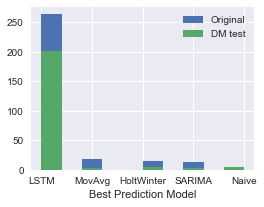

In [11]:
plt.style.use('seaborn')
comp['orig_best'].hist(label = 'Original',figsize = (4,3))
comp['best'].hist(label = 'DM test',figsize = (4,3))
plt.xlabel('Best Prediction Model')
plt.legend(loc = 'best')

In [25]:
comp['excLSTM'].count()/comp['orig_excLSTM'].count()

0.5

In [25]:
a = comp.loc[comp.orig_excLSTM == 'Naive']['orig_excLSTM'].count()
b = comp.loc[comp.orig_excLSTM == 'Naive']['orig_excLSTM'].count()/comp['orig_best'].count()
c = comp.loc[comp.excLSTM == 'Naive']['excLSTM'].count()
d = comp.loc[comp.excLSTM == 'Naive']['excLSTM'].count()/comp['orig_best'].count()
print(a,b,c,d)

26 0.08280254777070063 14 0.044585987261146494


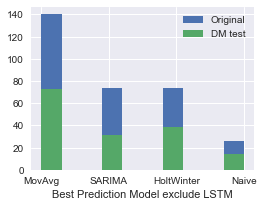

In [13]:
comp['orig_excLSTM'].hist(label = 'Original',figsize = (4,3))
comp['excLSTM'].hist(label = 'DM test',figsize = (4,3))
plt.xlabel('Best Prediction Model exclude LSTM')
plt.legend(loc = 'best')

### 1. Distributions of FF in Locations with Diff Best Models

In [3]:
ff = pd.read_csv('stackfootfall.csv')
ff = ff.drop(columns=['Unnamed: 0'])
ff.timestamp = pd.to_datetime(ff.timestamp, format = '%Y-%m-%d %H:%M:%S')

In [4]:
ff = ff.loc[(ff.timestamp >= '2018-01') & (ff.timestamp <= '2019-08-18 23:00')]

In [5]:
comp = comp.reset_index(drop=True)
comp

,location,best,excLSTM,orig_best,orig_excLSTM
0,5.0,LSTM,MovAvg,LSTM,MovAvg
1,6.0,LSTM,MovAvg,LSTM,MovAvg
2,7.0,NaN,MovAvg,LSTM,MovAvg
3,31.0,LSTM,SARIMA,LSTM,SARIMA
4,62.0,NaN,MovAvg,LSTM,MovAvg
...,...,...,...,...,...
309,1165.0,NaN,NaN,LSTM,SARIMA
310,1119.0,LSTM,MovAvg,LSTM,MovAvg
311,1166.0,NaN,NaN,HoltWinter,HoltWinter
312,1167.0,NaN,NaN,LSTM,MovAvg


In [54]:
comp.to_csv('comp.csv')

In [6]:
ff = pd.merge(ff, comp, how = 'inner', on = 'location')
ff.head()

,timestamp,location,device,footfall,year,month,day,hour,day_of_week,best,excLSTM,orig_best,orig_excLSTM
0,2018-01-01 00:00:00,5.0,1780.0,494.0,2018,1,1,0,1,LSTM,MovAvg,LSTM,MovAvg
1,2018-01-01 01:00:00,5.0,1780.0,899.0,2018,1,1,1,1,LSTM,MovAvg,LSTM,MovAvg
2,2018-01-01 02:00:00,5.0,1780.0,770.0,2018,1,1,2,1,LSTM,MovAvg,LSTM,MovAvg
3,2018-01-01 03:00:00,5.0,1780.0,599.0,2018,1,1,3,1,LSTM,MovAvg,LSTM,MovAvg
4,2018-01-01 04:00:00,5.0,1780.0,331.0,2018,1,1,4,1,LSTM,MovAvg,LSTM,MovAvg


In [7]:
ff_LSTM = ff.loc[ff.best == 'LSTM']
ff_MovAvg = ff.loc[ff.best == 'MovAvg']
ff_SARIMA = ff.loc[ff.best == 'SARIMA']
ff_HoltWinter = ff.loc[ff.best == 'HoltWinter']
ff_Naive = ff.loc[ff.best == 'Naive']

ff_LSTMsum = ff_LSTM.groupby('timestamp')['footfall'].mean().to_frame()
ff_MovAvgsum = ff_MovAvg.groupby('timestamp')['footfall'].mean().to_frame()
ff_SARIMAsum = ff_SARIMA.groupby('timestamp')['footfall'].mean().to_frame()
ff_HoltWintersum = ff_HoltWinter.groupby('timestamp')['footfall'].mean().to_frame()
ff_Naivesum = ff_Naive.groupby('timestamp')['footfall'].mean().to_frame()

Text(0.5, 0, 'Hour')

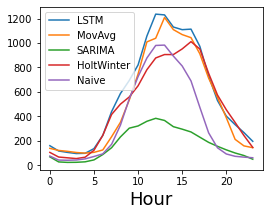

In [46]:
ff.loc[ff.best == 'LSTM'].groupby('hour')['footfall'].mean().plot.line(figsize = (4,3),label = 'LSTM')
ff.loc[ff.best == 'MovAvg'].groupby('hour')['footfall'].mean().plot.line(label = 'MovAvg')
ff.loc[ff.best == 'SARIMA'].groupby('hour')['footfall'].mean().plot.line(label = 'SARIMA')
ff.loc[ff.best == 'HoltWinter'].groupby('hour')['footfall'].mean().plot.line(label = 'HoltWinter')
ff.loc[ff.best == 'Naive'].groupby('hour')['footfall'].mean().plot.line(label = 'Naive')

plt.legend(loc = 'best')
plt.xlabel('Hour', fontsize=18)

Text(0.5, 0, 'Day of Week')

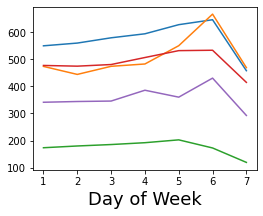

In [47]:
ff.loc[ff.best == 'LSTM'].groupby('day_of_week')['footfall'].mean().plot.line(figsize = (4,3),label = 'LSTM')
ff.loc[ff.best == 'MovAvg'].groupby('day_of_week')['footfall'].mean().plot.line(label = 'MovAvg')
ff.loc[ff.best == 'SARIMA'].groupby('day_of_week')['footfall'].mean().plot.line(label = 'SARIMA')
ff.loc[ff.best == 'HoltWinter'].groupby('day_of_week')['footfall'].mean().plot.line(label = 'HoltWinter')
ff.loc[ff.best == 'Naive'].groupby('day_of_week')['footfall'].mean().plot.line(label = 'Naive')
plt.xlabel('Day of Week', fontsize=18)

Text(0.5, 0, 'Month')

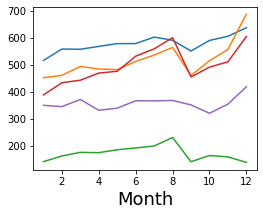

In [48]:
ff.loc[ff.best == 'LSTM'].groupby('month')['footfall'].mean().plot.line(figsize = (4,3),label = 'LSTM')
ff.loc[ff.best == 'MovAvg'].groupby('month')['footfall'].mean().plot.line(label = 'MovAvg')
ff.loc[ff.best == 'SARIMA'].groupby('month')['footfall'].mean().plot.line(label = 'SARIMA')
ff.loc[ff.best == 'HoltWinter'].groupby('month')['footfall'].mean().plot.line(label = 'HoltWinter')
ff.loc[ff.best == 'Naive'].groupby('month')['footfall'].mean().plot.line(label = 'Naive')
plt.xlabel('Month', fontsize=18)

In [42]:
daily_LSTM = ff_LSTMsum.resample('D').mean()
weekly_LSTM = ff_LSTMsum.resample('W').mean()
monthly_LSTM = ff_LSTMsum.resample('M').mean()

daily_MovAvg = ff_MovAvgsum.resample('D').mean()
weekly_MovAvg = ff_MovAvgsum.resample('W').mean()
monthly_MovAvg = ff_MovAvgsum.resample('M').mean()

daily_SARIMA = ff_SARIMAsum.resample('D').mean()
weekly_SARIMA = ff_SARIMAsum.resample('W').mean()
monthly_SARIMA = ff_SARIMAsum.resample('M').mean()

daily_HoltWinter = ff_HoltWintersum.resample('D').mean()
weekly_HoltWinter = ff_HoltWintersum.resample('W').mean()
monthly_HoltWinter = ff_HoltWintersum.resample('M').mean()

daily_Naive = ff_Naivesum.resample('D').mean()
weekly_Naive = ff_Naivesum.resample('W').mean()
monthly_Naive = ff_Naivesum.resample('M').mean()

In [43]:
daily_LSTM['LSTM'] = ff_LSTMsum.resample('D').mean()
weekly_LSTM['LSTM'] = ff_LSTMsum.resample('W').mean()
monthly_LSTM['LSTM'] = ff_LSTMsum.resample('M').mean()

daily_MovAvg['MovAvg'] = ff_MovAvgsum.resample('D').mean()
weekly_MovAvg['MovAvg'] = ff_MovAvgsum.resample('W').mean()
monthly_MovAvg['MovAvg'] = ff_MovAvgsum.resample('M').mean()

daily_SARIMA['SARIMA'] = ff_SARIMAsum.resample('D').mean()
weekly_SARIMA['SARIMA'] = ff_SARIMAsum.resample('W').mean()
monthly_SARIMA['SARIMA'] = ff_SARIMAsum.resample('M').mean()

daily_HoltWinter['HoltWinter'] = ff_HoltWintersum.resample('D').mean()
weekly_HoltWinter['HoltWinter'] = ff_HoltWintersum.resample('W').mean()
monthly_HoltWinter['HoltWinter'] = ff_HoltWintersum.resample('M').mean()

daily_Naive['Naive'] = ff_Naivesum.resample('D').mean()
weekly_Naive['Naive'] = ff_Naivesum.resample('W').mean()
monthly_Naive['Naive'] = ff_Naivesum.resample('M').mean()

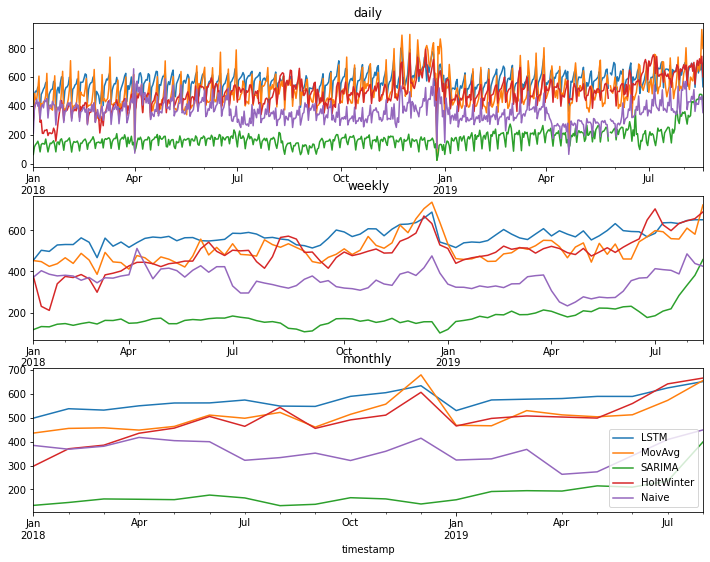

In [44]:
fig,axs = plt.subplots(3,1)
daily_LSTM['LSTM'].plot(figsize = (12,9),title = 'daily', label = 'LSTM', ax = axs[0])
daily_MovAvg['MovAvg'].plot(figsize = (12,9),title = 'daily', label = 'MovAvg', ax = axs[0])
daily_SARIMA['SARIMA'].plot(figsize = (12,9),title = 'daily', label = 'SARIMA', ax = axs[0])
daily_HoltWinter['HoltWinter'].plot(figsize = (12,9),title = 'daily', label = 'HoltWinter', ax = axs[0])
daily_Naive['Naive'].plot(figsize = (12,9),title = 'daily', label = 'Naive', ax = axs[0])

weekly_LSTM['LSTM'].plot(figsize = (12,9),title = 'weekly', ax = axs[1])
weekly_MovAvg['MovAvg'].plot(figsize = (12,9),title = 'weekly', ax = axs[1])
weekly_SARIMA['SARIMA'].plot(figsize = (12,9),title = 'weekly', ax = axs[1])
weekly_HoltWinter['HoltWinter'].plot(figsize = (12,9),title = 'weekly', ax = axs[1])
weekly_Naive['Naive'].plot(figsize = (12,9),title = 'weekly', ax = axs[1])

monthly_LSTM['LSTM'].plot(figsize = (12,9),title = 'monthly', ax = axs[2])
monthly_MovAvg['MovAvg'].plot(figsize = (12,9),title = 'monthly', ax = axs[2])
monthly_SARIMA['SARIMA'].plot(figsize = (12,9),title = 'monthly', ax = axs[2])
monthly_HoltWinter['HoltWinter'].plot(figsize = (12,9),title = 'monthly', ax = axs[2])
monthly_Naive['Naive'].plot(figsize = (12,9),title = 'monthly', ax = axs[2])

plt.legend(loc = 'best')

### 2. Distributions of FF in Locations with Diff Best Models (exclude LSTM)

In [32]:
ff_MovAvg = ff.loc[ff.excLSTM == 'MovAvg']
ff_SARIMA = ff.loc[ff.excLSTM == 'SARIMA']
ff_Naive = ff.loc[ff.excLSTM == 'Naive']
ff_HoltWinter = ff.loc[ff.excLSTM == 'HoltWinter']

In [33]:
ff_MovAvgsum = ff_MovAvg.groupby('timestamp')['footfall'].mean().to_frame()
ff_SARIMAsum = ff_SARIMA.groupby('timestamp')['footfall'].mean().to_frame()
ff_Naivesum = ff_Naive.groupby('timestamp')['footfall'].mean().to_frame()
ff_HoltWintersum = ff_HoltWinter.groupby('timestamp')['footfall'].mean().to_frame()

Text(0.5, 0, 'Hour')

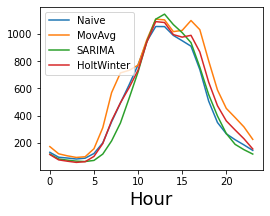

In [49]:
ff.loc[ff.excLSTM == 'Naive'].groupby('hour')['footfall'].mean().plot.line(figsize = (4,3),label = 'Naive')
ff.loc[ff.excLSTM == 'MovAvg'].groupby('hour')['footfall'].mean().plot.line(label = 'MovAvg')
ff.loc[ff.excLSTM == 'SARIMA'].groupby('hour')['footfall'].mean().plot.line(label = 'SARIMA')
ff.loc[ff.excLSTM == 'HoltWinter'].groupby('hour')['footfall'].mean().plot.line(label = 'HoltWinter')
plt.legend(loc = 'best')
plt.xlabel('Hour', fontsize=18)

Text(0.5, 0, 'Day of Week')

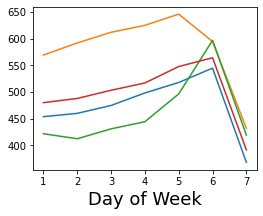

In [50]:
ff.loc[ff.excLSTM == 'Naive'].groupby('day_of_week')['footfall'].mean().plot.line(figsize = (4,3),label = 'Naive')
ff.loc[ff.excLSTM == 'MovAvg'].groupby('day_of_week')['footfall'].mean().plot.line(label = 'MovAvg')
ff.loc[ff.excLSTM == 'SARIMA'].groupby('day_of_week')['footfall'].mean().plot.line(label = 'SARIMA')
ff.loc[ff.excLSTM == 'HoltWinter'].groupby('day_of_week')['footfall'].mean().plot.line(label = 'HoltWinter')
plt.xlabel('Day of Week', fontsize=18)

Text(0.5, 0, 'Month')

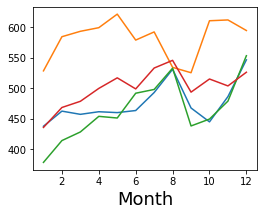

In [45]:
ff.loc[ff.excLSTM == 'Naive'].groupby('month')['footfall'].mean().plot.line(figsize = (4,3),label = 'Naive')
ff.loc[ff.excLSTM == 'MovAvg'].groupby('month')['footfall'].mean().plot.line(label = 'MovAvg')
ff.loc[ff.excLSTM == 'SARIMA'].groupby('month')['footfall'].mean().plot.line(label = 'SARIMA')
ff.loc[ff.excLSTM == 'HoltWinter'].groupby('month')['footfall'].mean().plot.line(label = 'HoltWinter')
plt.xlabel('Month', fontsize=18)

In [50]:
daily_Naive['Naive'] = ff_Naivesum.resample('D').mean()
weekly_Naive['Naive'] = ff_Naivesum.resample('W').mean()
monthly_Naive['Naive'] = ff_Naivesum.resample('M').mean()

daily_MovAvg['MovAvg'] = ff_MovAvgsum.resample('D').mean()
weekly_MovAvg['MovAvg'] = ff_MovAvgsum.resample('W').mean()
monthly_MovAvg['MovAvg'] = ff_MovAvgsum.resample('M').mean()

daily_SARIMA['SARIMA'] = ff_SARIMAsum.resample('D').mean()
weekly_SARIMA['SARIMA'] = ff_SARIMAsum.resample('W').mean()
monthly_SARIMA['SARIMA'] = ff_SARIMAsum.resample('M').mean()

daily_HoltWinter['HoltWinter'] = ff_HoltWintersum.resample('D').mean()
weekly_HoltWinter['HoltWinter'] = ff_HoltWintersum.resample('W').mean()
monthly_HoltWinter['HoltWinter'] = ff_HoltWintersum.resample('M').mean()

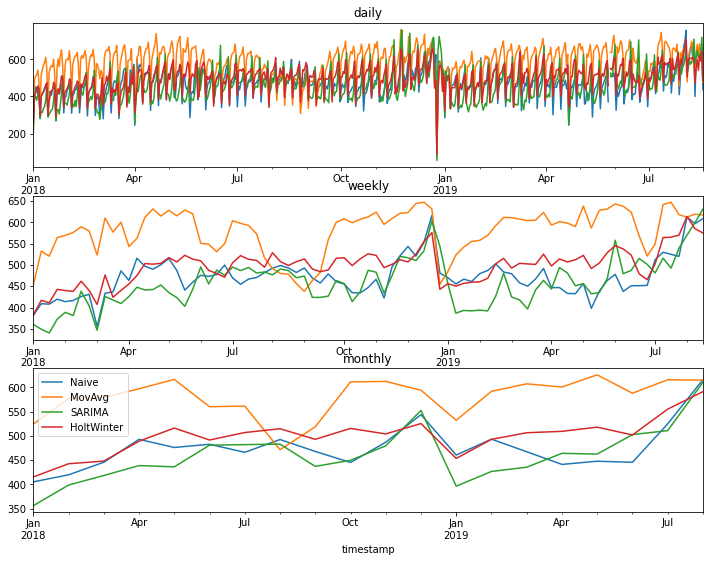

In [51]:
fig,axs = plt.subplots(3,1)
daily_Naive['Naive'].plot(figsize = (12,9),title = 'daily', label = 'Naive', ax = axs[0])
daily_MovAvg['MovAvg'].plot(figsize = (12,9),title = 'daily', label = 'MovAvg', ax = axs[0])
daily_SARIMA['SARIMA'].plot(figsize = (12,9),title = 'daily', label = 'SARIMA',ax = axs[0])
daily_HoltWinter['HoltWinter'].plot(figsize = (12,9),title = 'daily', label = 'HoltWinter',ax = axs[0])

weekly_Naive['Naive'].plot(figsize = (12,9),title = 'weekly', ax = axs[1])
weekly_MovAvg['MovAvg'].plot(figsize = (12,9),title = 'weekly', ax = axs[1])
weekly_SARIMA['SARIMA'].plot(figsize = (12,9),title = 'weekly', ax = axs[1])
weekly_HoltWinter['HoltWinter'].plot(figsize = (12,9),title = 'weekly', ax = axs[1])

monthly_Naive['Naive'].plot(figsize = (12,9),title = 'monthly', ax = axs[2])
monthly_MovAvg['MovAvg'].plot(figsize = (12,9),title = 'monthly', ax = axs[2])
monthly_SARIMA['SARIMA'].plot(figsize = (12,9),title = 'monthly', ax = axs[2])
monthly_HoltWinter['HoltWinter'].plot(figsize = (12,9),title = 'monthly', ax = axs[2])

plt.legend(loc = 'best')

In [3]:
ff = pd.read_csv('stackfootfall.csv')
ff.timestamp = pd.to_datetime(ff.timestamp, format = '%Y-%m-%d %H:%M:%S') 

In [4]:
ff = ff.loc[(ff.timestamp >= '2018-01') & (ff.timestamp <= '2019-08-18 23:00')]

In [5]:
max(ff.groupby('location')['footfall'].count())

14256

In [6]:
ff_count = ff.loc[ff.timestamp <= '2019-07-28 23:00'].groupby('location')['footfall'].count() / max(ff.groupby('location')['footfall'].count())
limit1 = ff_count.to_frame()
ff_test = ff.loc[(ff.timestamp >= '2019-07-29') & (ff.timestamp <= '2019-08-18 23:00')]
ff_test_count = ff_test.groupby('location')['footfall'].count() / max(ff_test.groupby('location')['footfall'].count())
limit2 = ff_test_count.to_frame()

In [8]:
limit2.describe()

,footfall
count,415.000000
mean,0.909925
std,0.219870
min,0.047619
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [7]:
temp = pd.merge(limit1, limit2, how = 'inner', on = 'location')
temp

,footfall_x,footfall_y
location,,
5.0,0.856902,1.0
6.0,0.851852,1.0
7.0,0.856902,1.0
31.0,0.964646,1.0
54.0,0.656566,1.0
...,...,...
1216.0,0.112795,1.0
1217.0,0.102694,1.0
1218.0,0.094276,1.0


In [9]:
temp['train missing ratio'] = 1 - temp['footfall_x']
temp['test missing ratio'] = 1 - temp['footfall_y']
temp

,footfall_x,footfall_y,train missing ratio,test missing ratio
location,,,,
5.0,0.856902,1.0,0.143098,0.0
6.0,0.851852,1.0,0.148148,0.0
7.0,0.856902,1.0,0.143098,0.0
31.0,0.964646,1.0,0.035354,0.0
54.0,0.656566,1.0,0.343434,0.0
...,...,...,...,...
1216.0,0.112795,1.0,0.887205,0.0
1217.0,0.102694,1.0,0.897306,0.0
1218.0,0.094276,1.0,0.905724,0.0


In [10]:
temp.to_csv('missing_ratio.csv')